<center>
    
# Univariate Timeseries Forecasting Toturial
</center>   

**Author: Suleman_Zack** <br>
**Date created:** 10/06/2021<br>
    

<center><img src='image.jpg' width="600" height="100"></center>



### Problem Description:
This notebook presents a tutorial for basic understanding of time series forecasting and its implementation in Python. The problem is to predict the daily temperature in a particular area at a 10mins interval. The dataset used in this tutorial is a multivariate dataset with 14 features from the Jena Climate dataset recorded by the [Max Planck Institute for Biogeochemistry](https://www.bgc-jena.mpg.de/wetter/). The dataset consists of 14 features such as temperature, pressure, humidity etc, recorded once per 10 minutes. In this univariate forecasting our main focus will be on the Temprerature **T (degC)** variable. Thus, the analysis and forecast will center on the temperature for each 10 minutes.


### Objective 
The main of objective of this notebook is to provide a basic step by step time series tutorial on how to apply the existing methods on real life data. By the end of this tutorial, the reader will;
- be exposed to time series data visualization
- understand terms used in time series analysis like trend, seasonality, sliding window, lags etc
- be able to load, clean and prepare time series data for analysis
- be able to transform time series data into supervised learning using a sliding-window representation.
- be able to evaluate, and make predictions with a Random ForestRegression and a Linear Regression model for time series forecasting.


### Methodology
The notebook focuses on the basic classical time series forecasting techniques like naive, moving average, ARIMA etc.

- Data importation
- Data exploration and visualization
    - Line Plot
    - Histogram
    - Density Plot
    - ACF, PACF 
     
- Data Modelling and forecasting
    - Naive Model
    - Linear Regression Model
    - Random Forest Regression

### Basic Definitions
* **Time series data:** Is a set of observations collected or recorded sequentially with respect to a specific time interval.
- **Time  Series Analysis:** The analysis and probing to understand historical time series data.
- **Time Series Forecasting:** The use of historical time series data to predict future observations.  

## Setup
The libraries used in this tutorial are
- Pandas: $\implies$ provides a dataframe structure for importing and wrangling data
- numpy: $\implies$ For the handling of arrays and some mathematival functions
- matplotlib: $\implies$  For visualization
- statsmodel: $\implies$ For modelling as well as visualizing the time series data
- sklearn: $\implies$ For evaluation of the predictions or forecast

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as Lr
#from pandas import read_csv
#from pandas import DataFrame
from pandas import concat
#from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor as Rf
#from matplotlib import pyplot

from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import warnings
# Model Evaluation
from sklearn.metrics import mean_squared_error as mse


### Data Importtion



A time series is a sequence of observations taken sequentially in time.

In [2]:

df_climate = pd.read_csv('jena_climate_2009_2016.csv',parse_dates=['Date Time'])#,index_col=0
df_climate.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [3]:
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date Time        420551 non-null  datetime64[ns]
 1   p (mbar)         420551 non-null  float64       
 2   T (degC)         420551 non-null  float64       
 3   Tpot (K)         420551 non-null  float64       
 4   Tdew (degC)      420551 non-null  float64       
 5   rh (%)           420551 non-null  float64       
 6   VPmax (mbar)     420551 non-null  float64       
 7   VPact (mbar)     420551 non-null  float64       
 8   VPdef (mbar)     420551 non-null  float64       
 9   sh (g/kg)        420551 non-null  float64       
 10  H2OC (mmol/mol)  420551 non-null  float64       
 11  rho (g/m**3)     420551 non-null  float64       
 12  wv (m/s)         420551 non-null  float64       
 13  max. wv (m/s)    420551 non-null  float64       
 14  wd (deg)         420

In [4]:
df_climate.shape

(420551, 15)

### Univariate Dataset Creation
In this tutorial, we will consider the univariate time series hence we select only one feature for the analysis. The temperature T (degC) is the variable of interest. The dataset has 420551 observations but will slice the firts 1440 observations for the analysis. The 1440 represents the observations for the first 5 days. Thus, we will analyze the temperaturs recorded for first 5 days at an interval of 10 minutes. The slicing isn't for any technical reason but to have a small data to speed the execution of the codes. The reader can choose to use the entire observations.

In [5]:
temp_data=df_climate[['Date Time','T (degC)']][:1440] # 10 days of data obserbations taken in 10 minutes interval
temp_data.rename(columns={'T (degC)':'Temp','Date Time':'Date'},inplace=True)
temp_data.head()

,Date,Temp
0,2009-01-01 00:10:00,-8.02
1,2009-01-01 00:20:00,-8.41
2,2009-01-01 00:30:00,-8.51
3,2009-01-01 00:40:00,-8.31
4,2009-01-01 00:50:00,-8.27


In [6]:
# Summary Statistics
temp_data.describe()

,Temp
count,1440.000000
mean,-8.593639
std,5.685620
min,-23.010000
25%,-12.652500
50%,-7.860000
75%,-3.927500
max,-0.630000


## Data Visualization

To give us a sense of the data we are working with, it is imperative to visualize the data to observe the trends and pattern in the data. The plots used are
- line plot
- histogram
- distribution plot
- lag plot


#### Line Plots

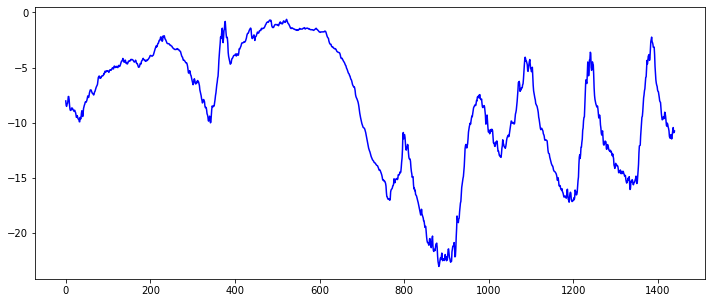

In [7]:
# Continuos line plot
temp_data['Temp'].plot(figsize=(12,5),color={'blue'});
#temp_data.plot(figsize=(12,5),color={'blue'})

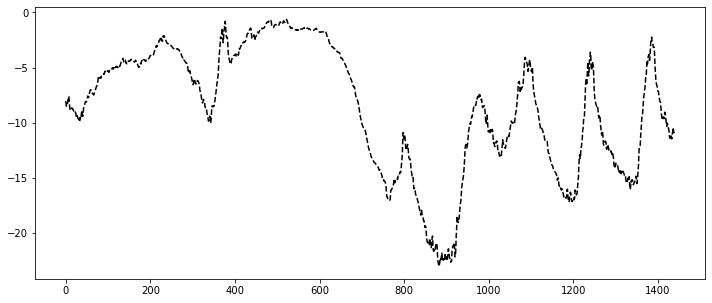

In [8]:
# Line plot with short dashes lines
temp_data['Temp'].plot(figsize=(12,5),style='k--');#,color={'blue'}#['Temp']

#### Histogram


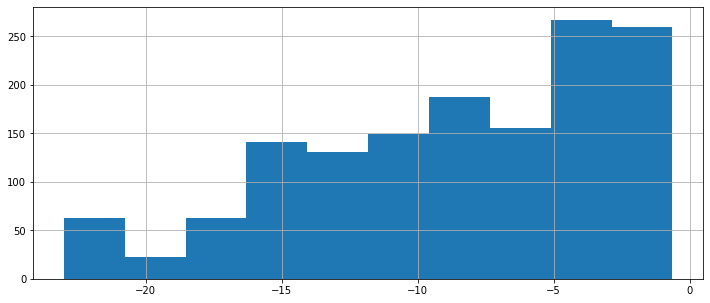

In [9]:
#
temp_data['Temp'].hist(figsize=(12,5));#,color='orange');

### Distribution Plot
This provides the distribution of the observations in the data. This data is negatively skewed.

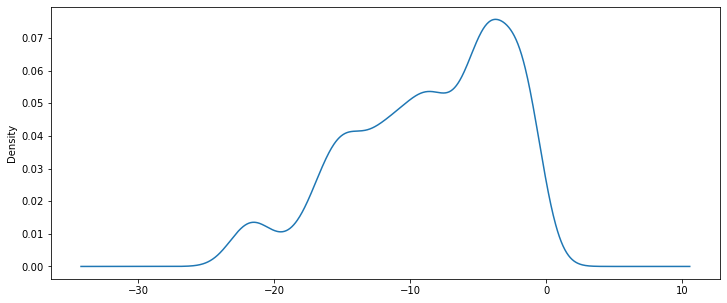

In [10]:
#['Temp']
temp_data['Temp'].plot(figsize=(12,5),kind='kde');#,color='orange');

### Lag plot
A lag of a time series observation is the observation prior to the present observation. The number of past observations determines the lag length. or example, 4-lag means the past four observations and n-lage $\implies$ the last n-obsetvations.


The lap plot assigns the observation at time t on the x-axis and the observation at the next time step (t+1) on the
y-axis.
- If the points cluster along a diagonal line from the bottom-left to the top-right of the plot,
it suggests a positive correlation relationship.
- If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests
a negative correlation relationship.
In both of the above, the indication is that, there is a strong correlation between an observation and the past observations.

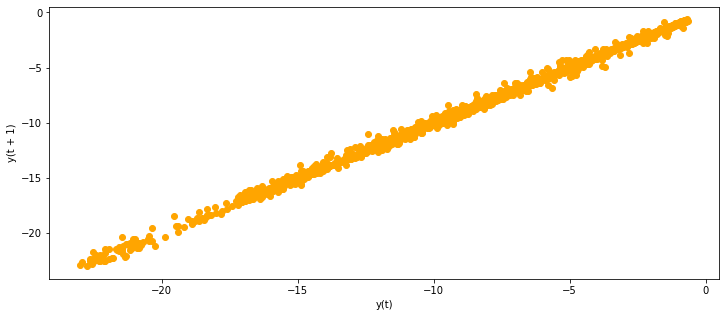

In [11]:
#['Temp']
plt.figure(figsize=(12,5))
lag_plot(temp_data['Temp'],c='orange')
plt.show()


### Autocorrelation Plot
The resulting plot shows lag along the x-axis and the correlation on the y-axis. Dotted lines
are provided that indicate any correlation values above those lines are statistically significant
(meaningful).

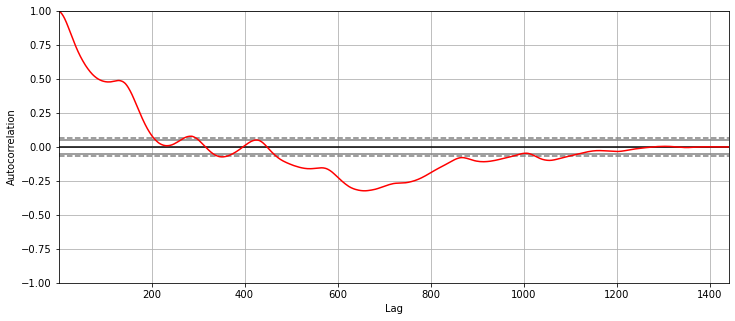

In [12]:
['Temp']
plt.figure(figsize=(12,5))
autocorrelation_plot(temp_data['Temp'],c='red')
plt.show()


In [13]:
#list(temp_data)

# Modelling and Forecasting
From the visualizations, we can conclude that,
- The data shows some form of seasonnality.
- There is a strong autocorrelation


### 1. Naive Forcasting Strategy
A naive forecast involves using the previous observation directly as the forecast without any
change. It is often called the persistence forecast as the prior observation is persisted. This
simple approach can be adjusted slightly for seasonal data. In this case, the observation at the
same time in the previous cycle may be persisted instead.<br> 
Technically, the **Naive forecast** assumes the obserbation at $t=t-1$ or $t+1=t$

In [14]:
# Using the naive method, the prdiction can be obtained as follows
data1=temp_data.copy()
data1['Prediction']=data1['Temp'].shift(1)
data1.head()

,Date,Temp,Prediction
0,2009-01-01 00:10:00,-8.02,NaN
1,2009-01-01 00:20:00,-8.41,-8.02
2,2009-01-01 00:30:00,-8.51,-8.41
3,2009-01-01 00:40:00,-8.31,-8.51
4,2009-01-01 00:50:00,-8.27,-8.31


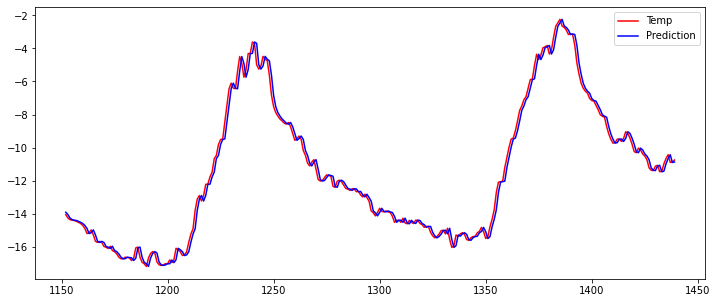

In [15]:
t_size=int(0.8*len(data1))
#data1[['Temp','Prediction']][t_size:].plot(figsize=(12,5),color={'blue','red'});

data1[['Temp','Prediction']][t_size:].plot(figsize=(12,5),color={'blue','red'});

In [16]:
# Naive Model Evaluation
print('MSE :',mse(data1['Temp'][t_size:],data1['Prediction'][t_size:]))

MSE : 0.1428166666666667


### Residual Plot
The errors from an ideal model would resemble white noise, that is a Gaussian distribution with a mean of zero and a symmetrical variance. A non-Gaussian distribution may suggest an opportunity
for data pre-processing. A skew in the distribution or a non-zero mean may suggest a bias in
forecasts that may be correct.

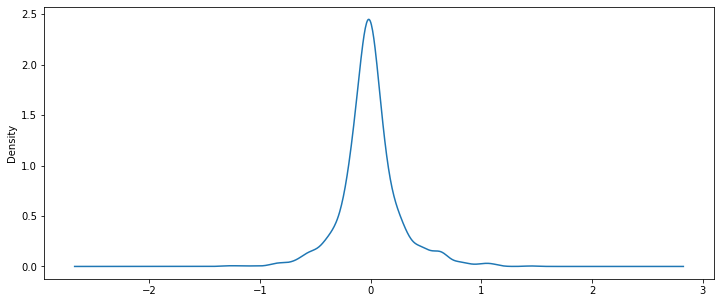

In [17]:

(data1['Temp']-data1['Prediction']).plot(figsize=(12,5),kind='kde');#,color='orange');

C:\Users\AmaliTech\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


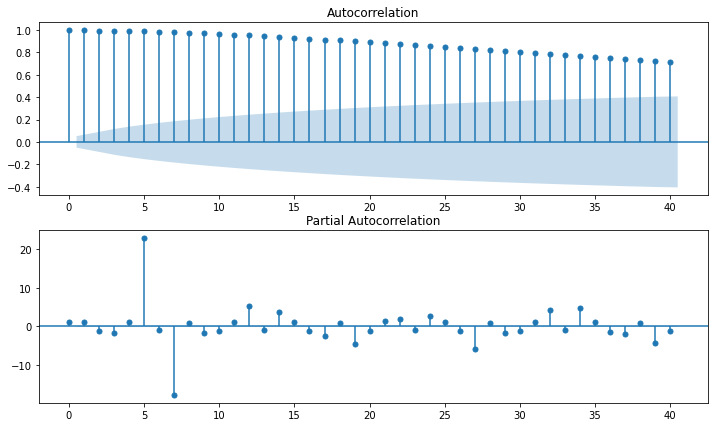

In [18]:
#fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5)
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(211)
fig = plot_acf(data1['Temp'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data1['Temp'].iloc[1:],lags=40,ax=ax2)

# Machine Learning Modelling

### Data Preparation
Given a sequence of numbers for a time series dataset, we can restructure the data to look like a supervised learning problem.

## Machine Learning Models

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as Lr
from sklearn.ensemble import RandomForestRegressor as Rf


In [20]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = pd.concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

### Model_1: Random Forest

In [35]:
series=temp_data.set_index('Date')
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)

n_test = int(0.2*len(data))
train, test=data[:-n_test, :], data[-n_test:, :]
trainX, trainy = train[:, :-1], train[:, -1]


predictions = list()
history = [x for x in train]


for i in range(len(test)):
    testX, testy = test[i, :-1], test[i, -1]
    model = Rf()
    model.fit(trainX, trainy)    
    yhat = model.predict([testX])#[test]
    predictions.append(yhat.tolist())
    history.append(test[i])

### Model Evaluation

In [36]:
print('Mean Squared Error:',mse(test[:,-1],predictions))

Mean Squared Error: 0.12763085737762256


### Prediction_Actual Plot

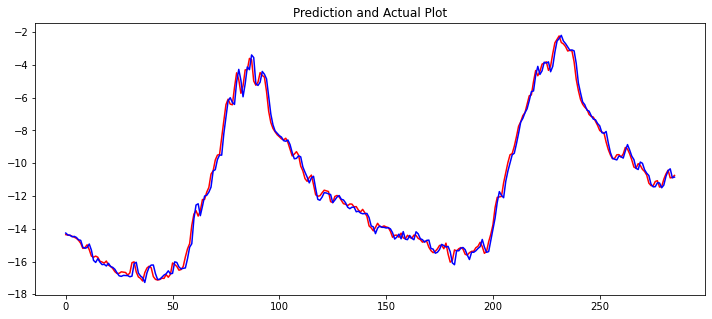

In [37]:
#results=DataFrame({'Test':test[:, -1],'Pred':predictions})
plt.figure(figsize=(12,5))
plt.plot(test[:,-1],label='Actual',color='red')
plt.plot(predictions,label='Predicted',color='blue')
plt.title('Prediction and Actual Plot')
plt.show()


### Residual Plot

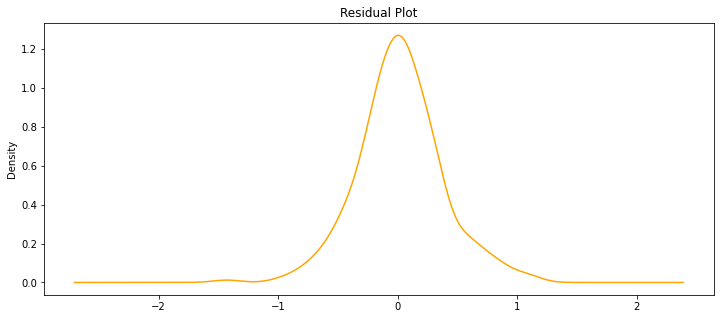

In [38]:
pd.Series(test[:,-1]-([item[0] for item in predictions])).plot(figsize=(12,5),color='orange',kind='kde',
                                                               title='Residual Plot');

### Model_2: Linear Regression

In [39]:
predictions1 = list()
history1 = [x for x in train]


for i in range(len(test)):
    # split test row into input and output columns
    testX, testy = test[i, :-1], test[i, -1]
    # fit model on history and make a prediction
    model1 = Lr()
    model1.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])#[test]
    # store forecast in list of predictions
    predictions1.append(yhat)
    # add actual observation to history for the next loop
    history1.append(test[i])


### Model Evaluation

In [40]:
print('Mean Squared Error:',mse(test[:,-1],predictions1))

Mean Squared Error: 0.12602930010489524


### Prediction_Actual Plot

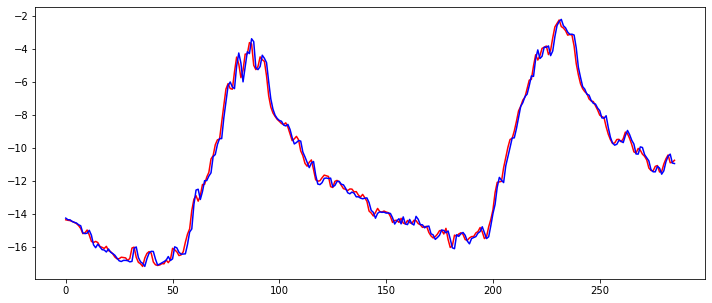

In [28]:
#results=DataFrame({'Test':test[:, -1],'Pred':predictions})
plt.figure(figsize=(12,5))
plt.plot(test[:,-1],label='Actual',color='red')
plt.plot(predictions1,label='Predicted',color='blue')
plt.show()


### Residual Plot

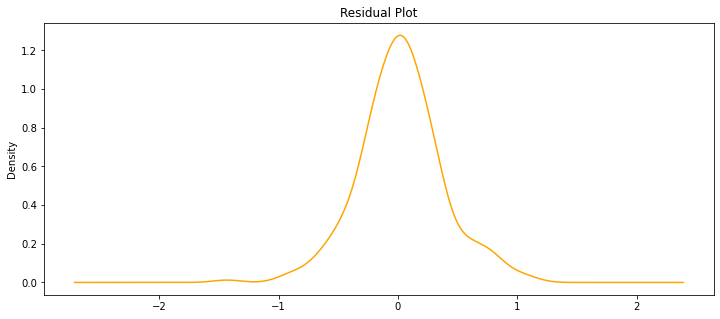

In [32]:
pd.Series(test[:,-1]-([item[0] for item in predictions1])).plot(figsize=(12,5),
                                                                color='orange',kind='kde',title='Residual Plot');

# Conclusion

This tutorial covered the basic Time Series Analysis and Forecasting concepts with their machine learning implementation in Python.
With respect to the dataset used the Linear Regression Model is the best among all the three models tested.<br>

**Future**
- Multivariate :  Regression, Decision Tree, Classification
- Times Series Forecasting using Deep Learning Models
    - CNN
    - LSTM

# References
* Jason Brownlee, <I>Introduction to Time Series with Python</I>, Edition: v1.9, 2020.
* Aileen Nielsen, <I>Practical Time Series Analysis: Prediction with Statistics & Machine Learning</I>, First Edition, 2019

